In [22]:
import random
import timeit
import matplotlib.pyplot as plt
import math

In [23]:
def busqueda_binaria(elementos, elemento_buscado):
    def _busqueda_binaria(elementos, elemento_buscado, low, high):
        medio = (low + high) // 2
        if(low <= high):
            if(elementos[medio] == elemento_buscado):
                return medio
            elif elementos[medio] > elemento_buscado:
                return _busqueda_binaria(elementos, elemento_buscado, low, medio - 1)
            else:
                return _busqueda_binaria(elementos, elemento_buscado, medio + 1, high)
        else:
            raise RuntimeError('Elemento no encontrado')
    low = 0
    high = len(elementos) - 1
    return _busqueda_binaria(elementos, elemento_buscado, low, high)

In [24]:
def busqueda_secuencial(elementos, elemento_buscado):
    def _busqueda_secuencial(elementos, elemento_buscado, posicion):
        if posicion >= len(elementos):
            raise RuntimeError('Elemento no encontrado')
        elif elementos[posicion] == elemento_buscado:
            return posicion
        else:
            return _busqueda_secuencial(elementos, elemento_buscado, posicion + 1)

    return _busqueda_secuencial(elementos, elemento_buscado, 0)

In [25]:
def busqueda_ternaria(elementos, elemento_buscado):
    cantidad_elementos = len(elementos)
    if cantidad_elementos < 3:
        return busqueda_secuencial(elementos, elemento_buscado)
    else:
        longitud_paso = cantidad_elementos // 3
        if elemento_buscado < elementos[longitud_paso]:
            return busqueda_ternaria(elementos[0:longitud_paso], elemento_buscado)
        else:
            segundo_tercio = math.floor((2 / 3) * cantidad_elementos)
            if elemento_buscado < elementos[segundo_tercio]:
                return busqueda_ternaria(elementos[longitud_paso:segundo_tercio], elemento_buscado)
            else:
                return busqueda_ternaria(elementos[segundo_tercio:cantidad_elementos], elemento_buscado)

In [26]:
def promediar(n_min, n_max, pasos, algoritmo):
    promedios_tiempo_ejecucion = list()
    for n in range(n_min, n_max, pasos):
        elementos = range(n_min, n + 1, pasos)
        total_tardado = 0

        for iteracion in range(0, iteraciones):
            tardado_en_iteracion = timeit.timeit(lambda: algoritmo(elementos, n), number=5)
            total_tardado += tardado_en_iteracion

        promedio = total_tardado / iteraciones
        promedios_tiempo_ejecucion.append(promedio)
    return promedios_tiempo_ejecucion

In [27]:
n_min = 10
n_max = 1000
pasos = 20
iteraciones = 30

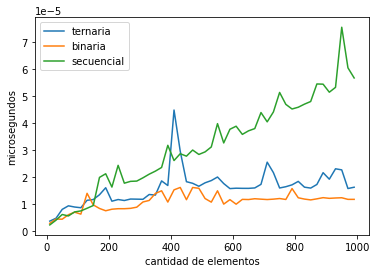

In [28]:
t_ternaria = promediar(n_min, n_max, pasos, busqueda_ternaria)
t_binaria = promediar(n_min, n_max, pasos, busqueda_binaria)
t_secuencial = promediar(n_min, n_max, pasos, busqueda_secuencial)

eje_x = list(range(n_min, n_max, pasos))
plt.plot(eje_x, t_ternaria, label = 'ternaria')
plt.plot(eje_x, t_binaria, label = 'binaria')
plt.plot(eje_x, t_secuencial, label = 'secuencial')

plt.xlabel('cantidad de elementos')
plt.ylabel('microsegundos')

plt.legend()